In [1]:
import os
print(os.getcwd())

C:\Users\장세환\Desktop\시계열\코로나_해외유입환자모델링


In [2]:
os.chdir("C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406")
print(os.getcwd)

<built-in function getcwd>


In [3]:
print(os.getcwd())

C:\Users\장세환\Desktop\시계열\코로나_해외유입환자모델링\corona_contest_data_0406


In [4]:
import tensorflow as tf
import sklearn 
import matplotlib as mpl
from fbprophet import Prophet
# General Library

import numpy as np
import pandas as pd
import time
import datetime
import random
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Library
from fbprophet import Prophet
import lightgbm as lgb
from sklearn.model_selection import train_test_split

C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

### 로밍 데이터
return: 로밍 여행자가 한국에 귀국한 날짜(ex)20200128 )
iso: 2자리 국가코드(ex)cn )
arrival: iso국가에 도착한 날짜(ex)20200123 )
departure: iso 국가에 떠난 날짜(ex) 20200128)
count: 고객 수(return 일자에 귀국한 로밍 고객 중 iso국가에 arrival에 도착해서 departure에 떠난 고객 수) (ex) 161)
### 감염병 데이터
- 파일명 : 파일리스트의 파일명과 일치
- 제목 : 기사 제목
- URL : 원문 링크
- 수집 일자 : KT 크롤링 시스템에 의해 기사가 수집된 날짜
- 게시 일자 : 원문 Site에 해당 기사가 게시된 날짜
- 채널명 : 기사가 게시된 Site의 이름
- 감염병명 : 기사에 표기된 감염병의 이름
- 분류명 : 감염병의 분류(카테고리) 명

In [5]:
roaming_df1=pd.read_csv('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/2. Roaming_data1.csv')
news_df=pd.read_csv('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/NewsList.csv')
patient_df=pd.read_excel('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/corona_dataset.xlsx')
patient_df_new=pd.read_excel('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/corona_dataset_508.xlsx')
Time_our=pd.read_csv('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/Time.csv')
p=pd.read_excel('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/corona_dataset_509.xlsx')


In [82]:
roaming_df1.head()

,return,iso,arrival,departure,count
0,20200131,ad,20200130,20200130,3
1,20200131,ae,20191231,20200125,3
2,20200131,ae,20191231,20200131,3
3,20200131,ae,20200102,20200102,3
4,20200131,ae,20200104,20200131,3


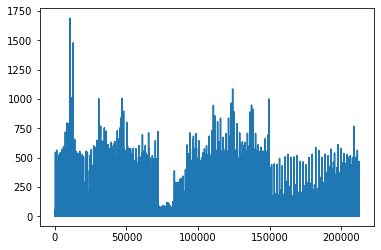

In [83]:
plt.plot(roaming_df1['count'])

In [85]:
roaming_df1[['iso', 'count']].groupby(['iso'], as_index=False).sum().sort_values(by='count', ascending = False)

,iso,count
166,vn,228695
75,jp,227822
32,cn,207934
150,th,103383
124,ph,100486
...,...,...
155,to,3
27,cf,3
98,ml,3
168,ws,3


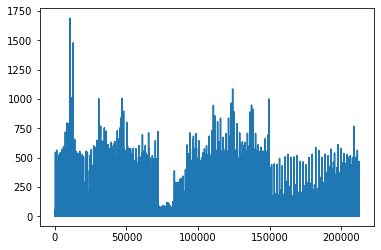

In [86]:
plt.plot(roaming_df1['count'])

In [88]:
roaming_df['return'] = roaming_df1['return'].apply(lambda x:pd.to_datetime(str(x), format='%Y%m%d'))
roaming_df['return_year'] = roaming_df1['return'].apply(lambda x : x.year)
roaming_df['return_month'] = roaming_df1['return'].apply(lambda x : x.month)
roaming_df['return_day'] = roaming_df1['return'].apply(lambda x : x.day)

NameError: name 'roaming_df' is not defined

# 환자수 사용시도 

In [89]:
patient_df.head()

,ds,y,ch,asia,europe,us,africa,austrailia
0,2020-01-20,1,1,0,0,0,0,0
1,2020-01-24,1,1,0,0,0,0,0
2,2020-01-26,1,1,0,0,0,0,0
3,2020-01-27,1,1,0,0,0,0,0
4,2020-01-30,1,1,0,0,0,0,0


In [90]:
y=patient_df['y']# prophet에 넣기 위해 변경
ds=patient_df['ds']
df=pd.concat([ds,y],axis=1)
df.head()#다변량으로 넣어도 유의미할지 잘모르겠음

,ds,y
0,2020-01-20,1
1,2020-01-24,1
2,2020-01-26,1
3,2020-01-27,1
4,2020-01-30,1


# 우라나라 환자수

In [95]:
Time_our.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


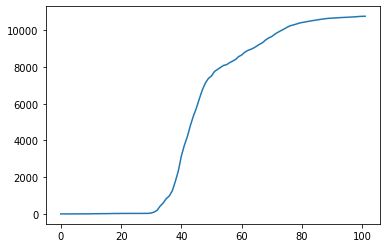

In [96]:
Time_our['confirmed'].plot()

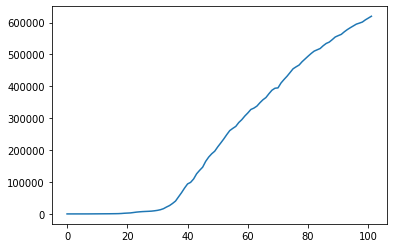

In [97]:
Time_our['test'].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000166D99E76C8>],
      dtype=object)

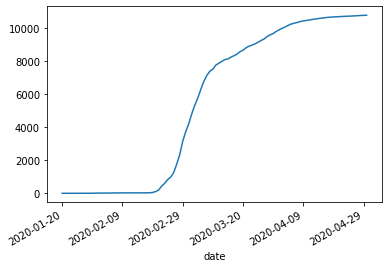

In [98]:
Time_our['confirmed'].astype(float)
uni_data2 = Time_our['confirmed']
uni_data2.index = Time_our['date']
uni_data2.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000166DBE83E88>],
      dtype=object)

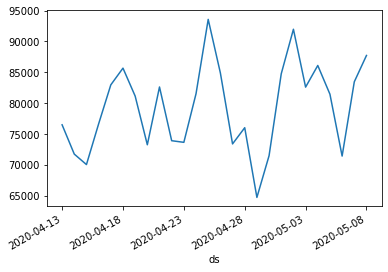

In [99]:
global1=pd.read_csv('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/global.csv')
global1['a'].astype(float)
uni_data3 = global1['a']
uni_data3.index = global1['ds']
uni_data3.plot(subplots=True)

In [8]:
y=patient_df['y']# prophet에 넣기 위해 변경
ds=patient_df['ds']
df=pd.concat([ds,y],axis=1)
df.head()#다변량으로 넣어도 유의미할지 잘모르겠음

,ds,y
0,2020-01-20,1
1,2020-01-24,1
2,2020-01-26,1
3,2020-01-27,1
4,2020-01-30,1


In [9]:
df['ds']=pd.to_datetime(df['ds'])

In [10]:
df['y'].astype(float)
uni_data = df['y']
uni_data.index = df['ds']
uni_data.head()

ds
2020-01-20    1
2020-01-24    1
2020-01-26    1
2020-01-27    1
2020-01-30    1
Name: y, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000166D744D288>],
      dtype=object)

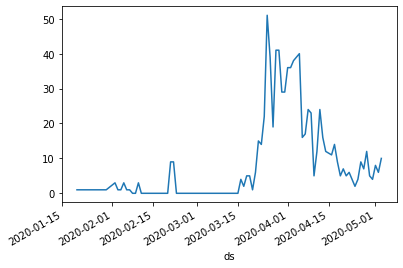

In [11]:
uni_data.plot(subplots=True)# 3/22 을 기점으로 확 뛰는 모습을 보인다.

3/22 을 기점으로 확 뛰는 모습을 보인다.
1. 3/22을 기준으로 데이터를 나눠서 피팅해서 확인해 보기
2. 기사크롤링, 로밍데이터에서 3/22에 어떤 사건이나 경향성이 바뀐것이 있는지 확인해보기->해주세용


In [12]:
# 1번
df1=df[55:]
df1.head()

,ds,y
55,2020-03-23,14
56,2020-03-24,22
57,2020-03-25,51
58,2020-03-26,39
59,2020-03-27,19


In [13]:
m = Prophet()
m.fit(df1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = m.make_future_dataframe(periods=18)
future.tail()

,ds
53,2020-05-17
54,2020-05-18
55,2020-05-19
56,2020-05-20
57,2020-05-21


In [15]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
53,2020-05-17,-5.895254,-15.278003,3.583369
54,2020-05-18,-18.711474,-28.049400,-9.874039
55,2020-05-19,-17.368573,-26.530748,-7.854780
56,2020-05-20,-9.689820,-18.801689,-0.560588
57,2020-05-21,-14.011219,-23.100505,-4.250612


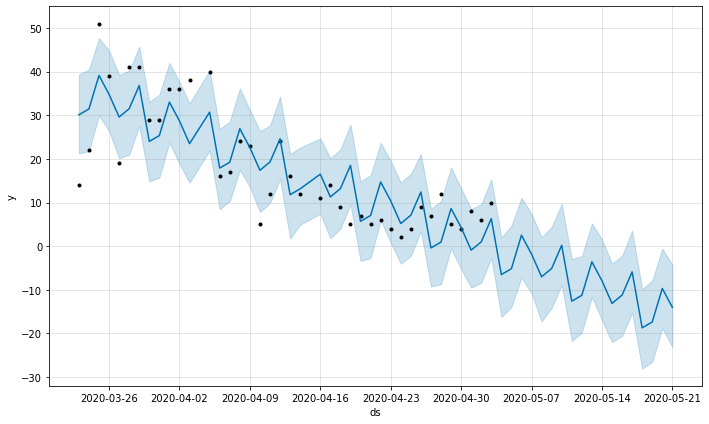

In [17]:
fig1 = m.plot(forecast)

In [18]:
# 최근 트렌드를 더 반영하기 위하여 앞부분만 다시 피팅
df2=df[80:]
df2.head()

,ds,y
80,2020-04-19,5
81,2020-04-20,7
82,2020-04-21,5
83,2020-04-22,6
84,2020-04-23,4


In [19]:
m = Prophet()
m.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [20]:
future = m.make_future_dataframe(periods=20)
future.tail()

,ds
30,2020-05-19
31,2020-05-20
32,2020-05-21
33,2020-05-22
34,2020-05-23


In [21]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
30,2020-05-19,16.901772,15.022863,18.654534
31,2020-05-20,13.885511,12.064359,15.596424
32,2020-05-21,12.377389,10.624545,14.319529
33,2020-05-22,13.382836,11.621372,15.118699
34,2020-05-23,13.382849,11.573299,15.074341


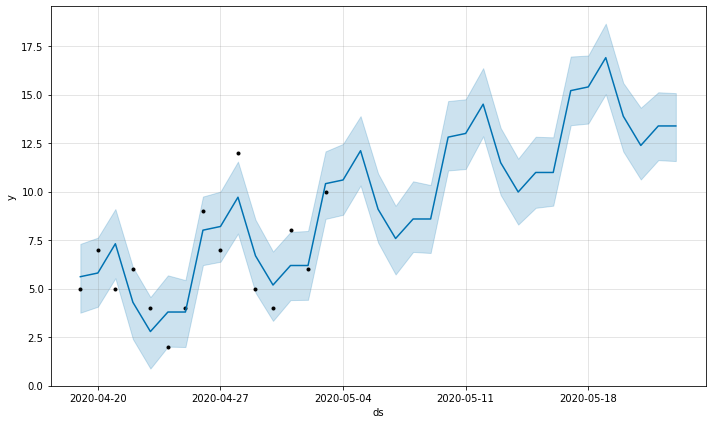

In [22]:
fig2 = m.plot(forecast)

최신 데이터 위주로 더 짧게 추정하니 조금 더 그럴 듯 해지기 시작했다.
그렇다면 관건은 미래(5월6~19일)의 트렌드를 가장 잘 담을 수 있는 구간이 언제부터인가 고민하는것이다.
또한 데이터가 적어 오버피팅의 우려가 있고 예상하지 못하는 사건(ex) 입국자 격리제한 해제 및 입국 자유 등)이 예상구간에 발생한다면 잡아내기 힘들 것으로 보인다.
<생각해볼 점>
1. 과거의 해외환자유입수가 현재의 해외환자유입수에 얼마나 영향을 미치는가?
2. 언제까지의 트렌드가 미래의 트렌드에 영향을 미치는가
3. 과거의 트렌드까지 반영해주는 것보다 현재와 가까운 트렌드 위주로 반영해주는것이 더 잘 예측할 수도 있겠다!->lstm보다 rnn이 나을수도 있다.
-> 반복해서 구간별로 잘라서 예측해보자
->2주단위를 잘 예측할 수 있는 데이터 구간을 찾자! (lgbmregressor, mlpregressor)

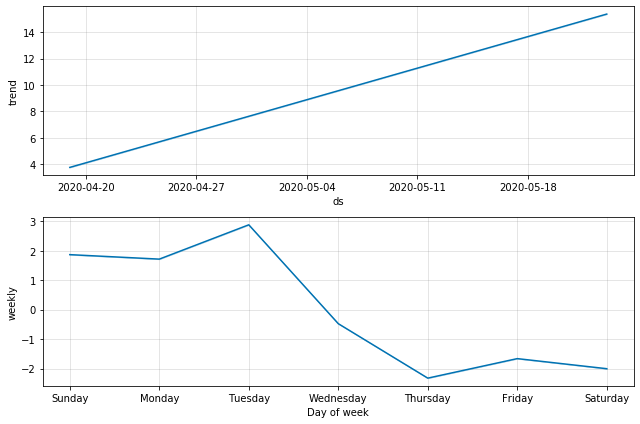

In [23]:
fig2 = m.plot_components(forecast)

# 최적의 x,y 를 찾자 ->grid search
df2=df[x:]
future = m.make_future_dataframe(periods=y)
forecast = m.predict(future)
fig = m.plot(forecast)

데이터를 구간을 나눠서 x,y 를 따로따로 학습시켜보자

In [24]:
df_1=df[:15]
df_2=df[15:30]
df_3=df[30:45]
df_4=df[45:60]
df_5=df[60:75]
df_6=df[75:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000166D8F863C8>],
      dtype=object)

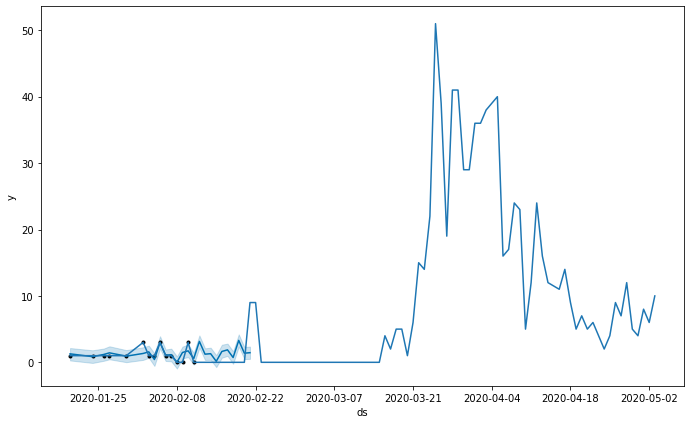

In [25]:
m_1 = Prophet()
m_1.fit(df_1)
future_1 = m_1.make_future_dataframe(periods=10)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

# period를 얼마로 지정하는것은 분석에 관계가 없다
->데이터 구간 잘 나누기

In [26]:
df_1=df[:10]
df_2=df[10:20]
df_3=df[20:30]
df_4=df[40:50]
df_5=df[60:70]
df_6=df[70:80]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000166D7445608>],
      dtype=object)

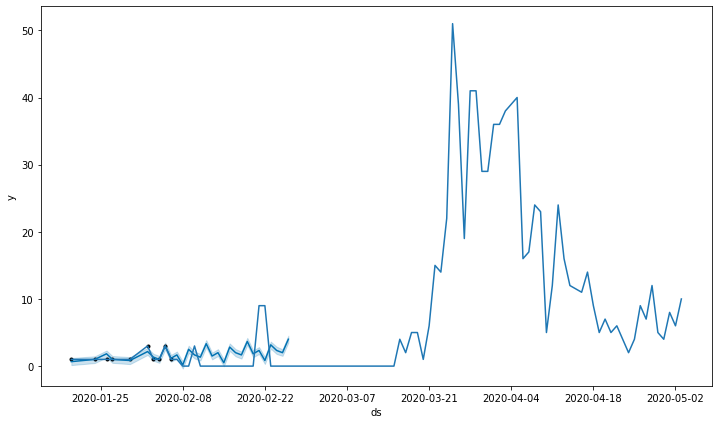

In [27]:
m_1 = Prophet()
m_1.fit(df_1)
future_1 = m_1.make_future_dataframe(periods=20)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

# 10개씩 자르니 확연히 언더피팅된 모습을 볼 수 있다.

In [28]:
df_1=df[:20]
df_2=df[20:40]
df_3=df[40:60]
df_4=df[60:80]
df_5=df[80:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000166D8E97988>],
      dtype=object)

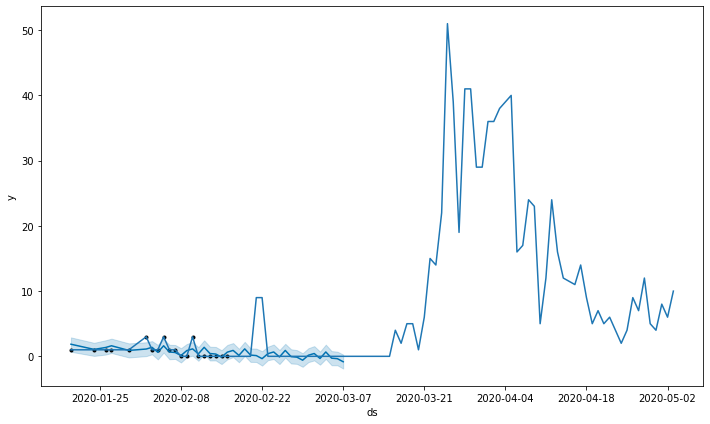

In [29]:
m_1 = Prophet()
m_1.fit(df_1)
future_1 = m_1.make_future_dataframe(periods=20)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

# 여전히 언더피팅이 보이므로 30개씩 슬라이싱

In [30]:
df_1=df[:30]
df_2=df[30:60]
df_3=df[60:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000166D8B86388>],
      dtype=object)

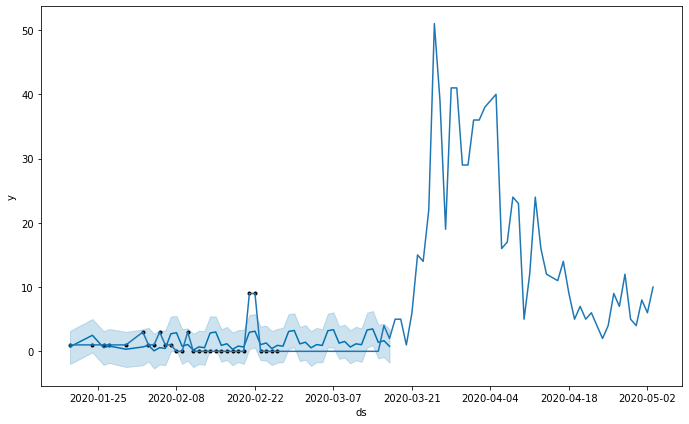

In [31]:
m_1 = Prophet()
m_1.fit(df_1)
future_1 = m_1.make_future_dataframe(periods=20)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

# 오버피팅이 보이므로 20~30 사이에 최적의 하이퍼파리미터가 있을거라 추측가능

In [32]:
df_1=df[:25]
df_2=df[25:50]
df_3=df[50:75]
df_4=df[75:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000166D9063B88>],
      dtype=object)

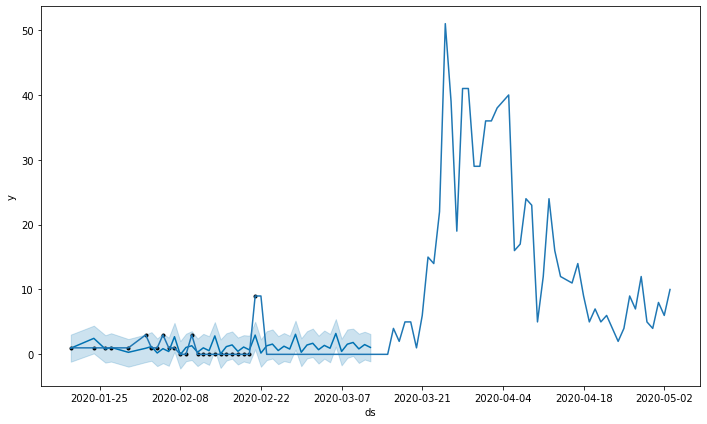

In [33]:
m_1 = Prophet()
m_1.fit(df_1)
future_1 = m_1.make_future_dataframe(periods=20)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000166DB409B88>],
      dtype=object)

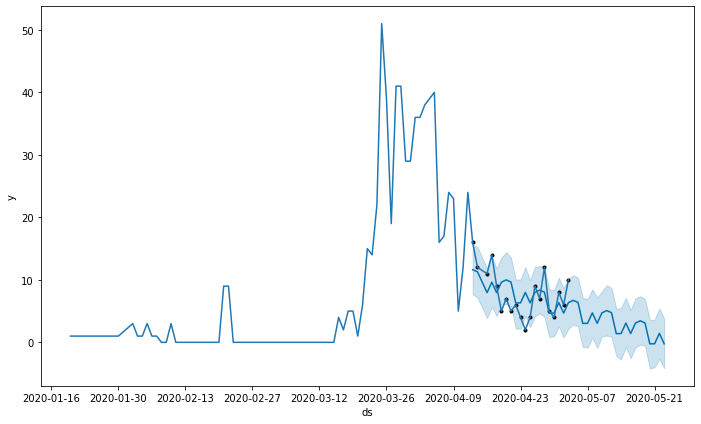

In [34]:
m_4 = Prophet()
m_4.fit(df_4)
future_4 = m_4.make_future_dataframe(periods=20)
forecast_4 = m_4.predict(future_4)
fig_4 = m_4.plot(forecast_4)
uni_data.plot(subplots=True)

# 25개정도로 슬라이싱 한것이 적절히 피팅되었다고 판단

In [35]:
patient_df510=pd.read_excel('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/corona_dataset_5010.xlsx') 

In [36]:
patient_df510[75:]

,ds,y,ch,asia,europe,us,africa,austrailia,global
75,2020-04-13,16,0,1,3,12,0,0,76496.0
76,2020-04-14,12,0,1,2,9,0,0,71749.0
77,2020-04-16,11,0,2,2,7,0,0,70053.0
78,2020-04-17,14,0,3,1,10,0,0,76646.0
79,2020-04-18,9,0,1,2,6,0,0,82967.0
80,2020-04-19,5,0,0,2,3,0,0,85678.0
81,2020-04-20,7,0,0,0,7,0,0,81153.0
82,2020-04-21,5,0,1,1,3,0,0,73262.0
83,2020-04-22,6,0,2,2,2,0,0,82625.0
84,2020-04-23,4,1,1,0,2,0,0,73920.0


In [100]:
y=patient_df510['y']# prophet에 넣기 위해 변경
ds=patient_df510['ds']
df=pd.concat([ds,y],axis=1)
test=df[97:]
df=df[75:97]
df

,ds,y
75,2020-04-13,16
76,2020-04-14,12
77,2020-04-16,11
78,2020-04-17,14
79,2020-04-18,9
80,2020-04-19,5
81,2020-04-20,7
82,2020-04-21,5
83,2020-04-22,6
84,2020-04-23,4


In [101]:
test

,ds,y
97,2020-05-06,2
98,2020-05-07,3
99,2020-05-08,11
100,2020-05-09,1
101,2020-05-10,8


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000166DBF3BB08>],
      dtype=object)

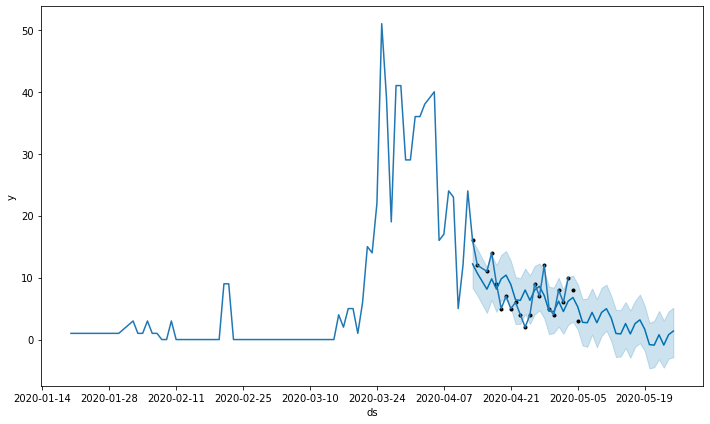

In [102]:
df['ds']=pd.to_datetime(df['ds'])
m_1 = Prophet()
m_1.fit(df)
future_1 = m_1.make_future_dataframe(periods=20)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

In [103]:
 forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-04-13,10.344110,8.348397,15.977454,10.344110,10.344110,1.863192,1.863192,1.863192,1.863192,1.863192,1.863192,0.0,0.0,0.0,12.207303
1,2020-04-14,10.086185,7.125306,14.613318,10.086185,10.086185,0.619981,0.619981,0.619981,0.619981,0.619981,0.619981,0.0,0.0,0.0,10.706166
2,2020-04-16,9.570334,4.295261,11.643690,9.570334,9.570334,-1.436953,-1.436953,-1.436953,-1.436953,-1.436953,-1.436953,0.0,0.0,0.0,8.133381
3,2020-04-17,9.312409,6.398485,13.590159,9.312409,9.312409,0.490476,0.490476,0.490476,0.490476,0.490476,0.490476,0.0,0.0,0.0,9.802885
4,2020-04-18,9.054484,4.467470,12.021368,9.054484,9.054484,-0.919599,-0.919599,-0.919599,-0.919599,-0.919599,-0.919599,0.0,0.0,0.0,8.134884
5,2020-04-19,8.796558,6.338919,13.665798,8.796558,8.796558,1.007830,1.007830,1.007830,1.007830,1.007830,1.007830,0.0,0.0,0.0,9.804389
6,2020-04-20,8.538633,6.478012,14.293790,8.538633,8.538633,1.863192,1.863192,1.863192,1.863192,1.863192,1.863192,0.0,0.0,0.0,10.401825
7,2020-04-21,8.280708,5.086654,12.699443,8.280708,8.280708,0.619981,0.619981,0.619981,0.619981,0.619981,0.619981,0.0,0.0,0.0,8.900689
8,2020-04-22,8.022782,2.500885,10.097515,8.022782,8.022782,-1.624927,-1.624927,-1.624927,-1.624927,-1.624927,-1.624927,0.0,0.0,0.0,6.397855
9,2020-04-23,7.764857,2.549385,9.883647,7.764857,7.764857,-1.436953,-1.436953,-1.436953,-1.436953,-1.436953,-1.436953,0.0,0.0,0.0,6.327904


In [104]:
 forecast_1[22:27]['yhat']

22    2.786901
23    2.716949
24    4.386454
25    2.718453
26    4.387957
Name: yhat, dtype: float64

# 성능 평가

In [105]:
y=[2,3,11,1,8]
yhat=[2.786901,2.716949
,4.386454
,2.718453
,4.387957]
a=[]
b=[]
for i in range(len(y)):
    a.append((y[i]-yhat[i])**2)
for i in range(len(y)):
    b.append(y[i]**2)
100*(1-np.sum(a)/np.sum(b))    

69.62901653589145

In [106]:
 forecast_1[22:36]['yhat']

22    2.786901
23    2.716949
24    4.386454
25    2.718453
26    4.387957
27    4.985394
28    3.484257
29    0.981423
30    0.911472
31    2.580976
32    0.912976
33    2.582480
34    3.179917
35    1.678780
Name: yhat, dtype: float64